# Adult Income Classification

# About Dataset

**Source** :
Kaggle
https://www.kaggle.com/datasets/uciml/adult-census-income

**Klasifikasi**
*  memprediksi apakah seseorang memiliki pendapatan lebih dari $50.000 per tahun (>50K) atau tidak (<=50K)



---



**Columns**
* age (num)	: usia individu dalam tahun
* workclass (category)	: jenis pekerjaan (contoh: Private, Self-emp-not-inc, Government, dll)
* fnlwgt (num): : final weight (bobot yang merepresentasikan jumlah orang dengan karakteristik serupa dalam populasi)
* education (category) : tingkat pendidikan terakhir yang ditamatkan (contoh: Bachelors, HS-grad)
* education-num (num) : representasi numerik dari tingkat pendidikan (semakin tinggi nilainya, semakin tinggi tingkat pendidikannya)
* marital-status (ca)	: status pernikahan (contoh: Married-civ-spouse, Never-married)
* occupation (ca) : jenis pekerjaan (contoh: Tech-support, Craft-repair, Sales, dll)
* relationship (ca)	hubungan dengan kepala keluarga (contoh: Husband, Wife, Not-in-family)
* race	(ca)	: ras (contoh: White, Black, Asian-Pac-Islander, dll)
* sex	(ca) : jenis kelamin (Male/Female)
* capital-gain (num) : keuntungan modal tahunan yang diperoleh (misalnya dari investasi)
* capital-loss (num) : kerugian modal tahunan
*hours-per-week (num) : umlah jam kerja per minggu
* native-country (ca) : negara asal individu (contoh: United-States, Mexico, Philippines, dll)
* income	(ca) : kelas target: <=50K atau >50K — menunjukkan apakah pendapatan tahunan melebihi $50.000 atau tidak, berperan sebagai **label**

# Pre-processing

## Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [ ]:
!git clone https://github.com/arindranr/adult-income-dataset

fatal: destination path 'adult-income-dataset' already exists and is not an empty directory.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/adult-income-dataset/adult-income-dataset.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (32561, 15)

First 5 rows of the dataset:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-State

## Data Cleaning

### Missing Values

Mengganti ? menjadi null value

In [ ]:
columns = df.columns
df[columns] = df.replace('?',np.nan)

In [ ]:
mode_nativecountry=df['native.country'].mode()[0]

Mengganti null values pada data untuk beberapa kolom

In [ ]:
df['workclass'] = df['workclass'].fillna('Unemployed')
df['occupation'] = df['occupation'].fillna('None')
df['native.country'] = df['native.country'].fillna(mode_nativecountry)

In [ ]:
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unemployed,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unemployed,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Duplicate Values

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 24


In [ ]:
if duplicate_count > 0:
    df = df.drop_duplicates(keep='last')
    print(f"Removed {duplicate_count} duplicate rows. New shape: {df.shape}")

Removed 24 duplicate rows. New shape: (32537, 15)


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows after cleaning: {duplicate_count}")


Number of duplicate rows after cleaning: 0


## EDA & Visualization

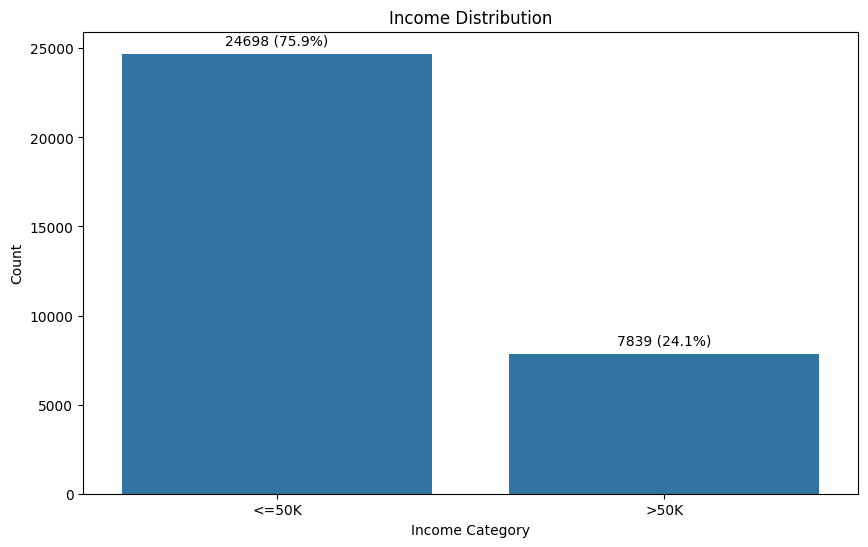

In [ ]:
plt.figure(figsize=(10, 6))
income_counts = df['income'].value_counts()
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.ylabel('Count')
plt.xlabel('Income Category')
for i, count in enumerate(income_counts):
    plt.text(i, count + 500, f"{count} ({count/len(df)*100:.1f}%)", ha='center')
# plt.savefig('income_distribution.png')
plt.show()

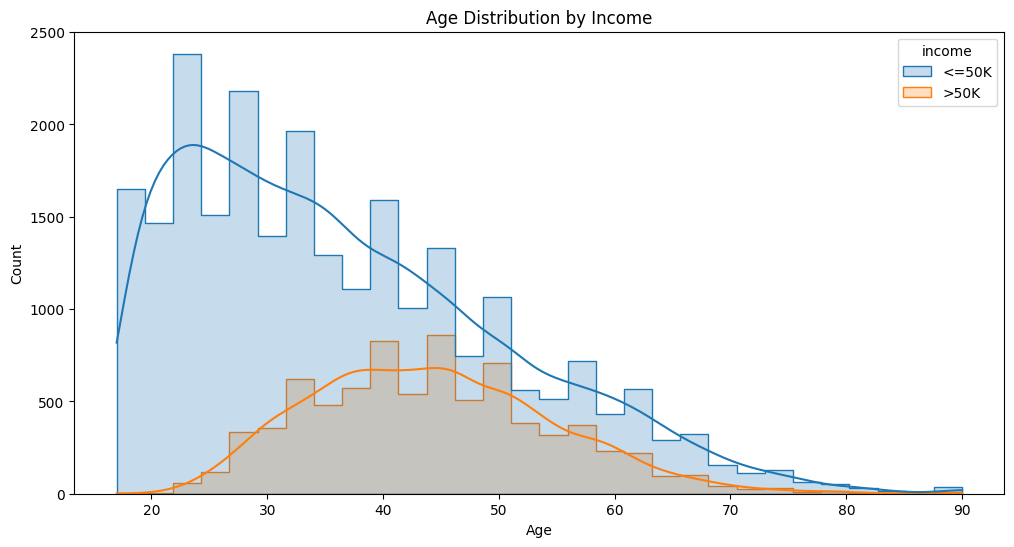

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='income', element='step', bins=30, kde=True)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
# plt.savefig('age_distribution.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

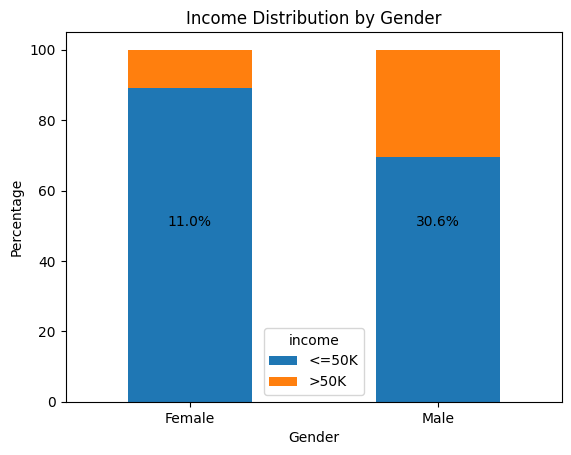

In [ ]:
plt.figure(figsize=(10, 6))
gender_income = pd.crosstab(df['sex'], df['income'], normalize='index') * 100
gender_income.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
for i, (index, row) in enumerate(gender_income.iterrows()):
    plt.text(i, 50, f"{row['>50K']:.1f}%", ha='center')

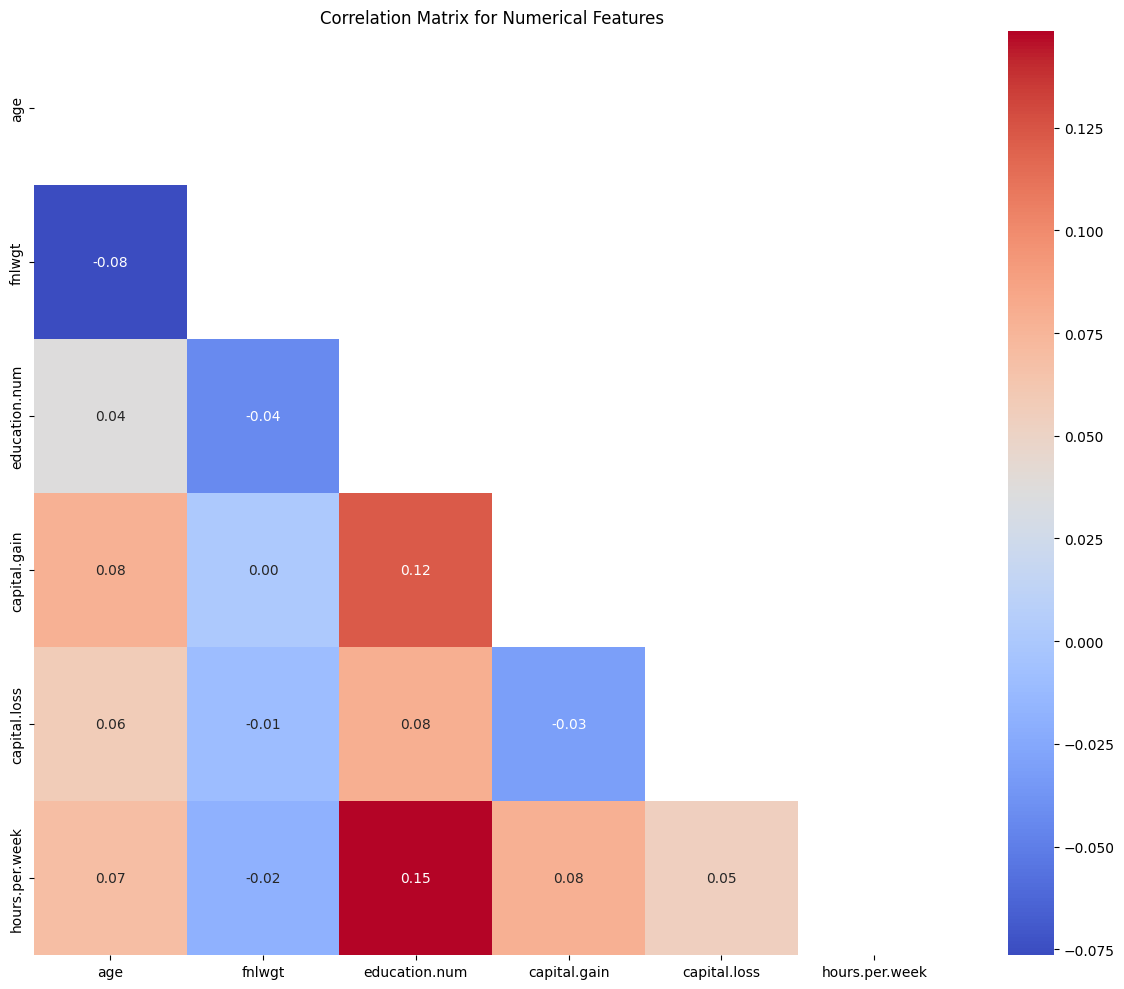

In [ ]:
plt.figure(figsize=(12, 10))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.show()

## Feature Engineering

Mengonversi nilai dalam kolom income yang berisi kategori <=50K dan >50K menjadi nilai numerik (0 dan 1).

In [ ]:
# menggunakan .replace() untuk mengganti nilai dalam kolom 'income'
df['income'] = df['income'].replace({"<=50K": 0, ">50K": 1})

### Grouping (age)

In [ ]:
def ageGrouping(column):
    if column<= 30 & column>=17:
        return "Youth"
    elif column <= 50:
        return "Middle-aged"
    else:
        return "Senior"

df['age_group'] = df['age'].apply(ageGrouping)

# hours worked category
df["work_hours_per_age"] = df["hours.per.week"] / df["age"]  # Workload relative to age
df['work_intensity'] = pd.cut(df['hours.per.week'], bins=[0, 20, 40, 60, 168],
                             labels=['Part-time', 'Full-time', 'Over-time', 'Extreme'])

# capital feature
df['net_capital'] = df['capital.gain'] - df['capital.loss']
df['has_capital_gain'] = (df['capital.gain'] > 0).astype(int)
df['has_capital_loss'] = (df['capital.loss'] > 0).astype(int)

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,age_group,work_hours_per_age,work_intensity,net_capital,has_capital_gain,has_capital_loss
0,90,Unemployed,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,...,4356,40,United-States,0,Senior,0.444444,Full-time,-4356,0,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356,18,United-States,0,Senior,0.219512,Part-time,-4356,0,1
2,66,Unemployed,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,...,4356,40,United-States,0,Senior,0.606061,Full-time,-4356,0,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900,40,United-States,0,Senior,0.740741,Full-time,-3900,0,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900,40,United-States,0,Middle-aged,0.975610,Full-time,-3900,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,...,0,40,United-States,0,Youth,1.818182,Full-time,0,0,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,38,United-States,0,Middle-aged,1.407407,Full-time,0,0,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,40,United-States,1,Middle-aged,1.000000,Full-time,0,0,0
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0,40,United-States,0,Senior,0.689655,Full-time,0,0,0


### Mapping for Some Columns

Education (mapping lalu lakukan penomoran sesuai dengan pengaturan mapping)

In [ ]:
school_levels = ['11th', '7th-8th', '10th', '5th-6th', '9th', '12th', '1st-4th', 'Preschool']
associate_levels = ['Assoc-acdm', 'Assoc-voc']
post_masters_levels = ['Doctorate', 'Prof-school']

df['education'] = df['education'].replace(school_levels, 'School')
df['education'] = df['education'].replace(associate_levels, 'Associate')
df['education'] = df['education'].replace(post_masters_levels, 'Post-masters')

df['education'] = df['education'].replace({
    'School': 1,
    'HS-grad': 2,
    'Some-college': 3,
    'Associate': 4,
    'Bachelors': 5,
    'Masters': 6,
    'Post-masters': 7
})


In [ ]:
print(df[['education']])

       education
0              2
1              2
2              3
3              1
4              3
...          ...
32556          3
32557          4
32558          2
32559          2
32560          2

[32537 rows x 1 columns]


Marital Status
* menyederhanakan kategori status pernikahan (marital status) agar analisis lebih mudah



marital.status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


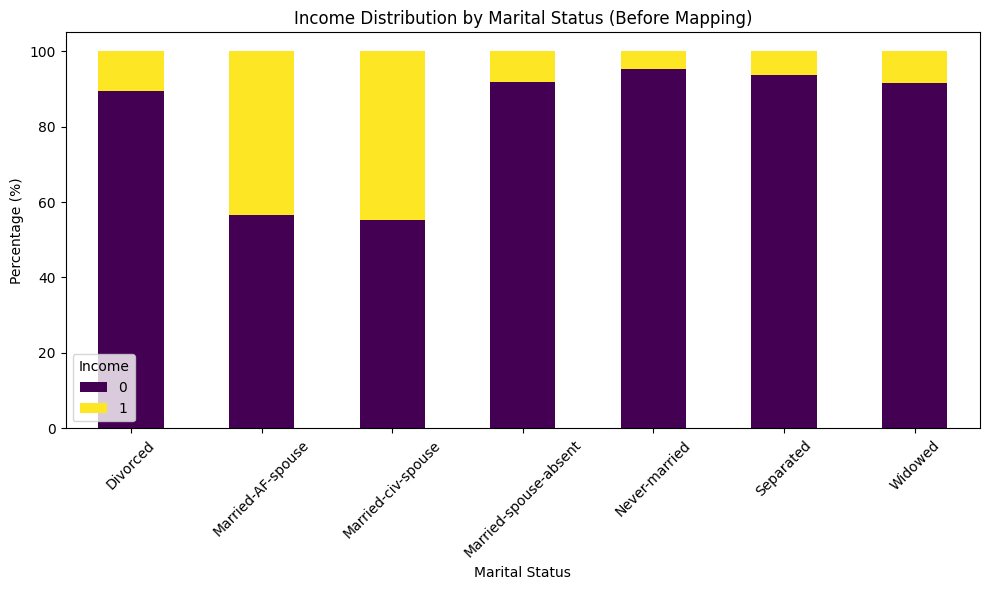

In [ ]:
print(df['marital.status'].value_counts()) # cek frekuensi kemunculan setiap kategorinya

marital_income_percent = (
    df.groupby('marital.status')['income']
      .value_counts(normalize=True)
      .unstack() * 100
) # distribusi income by marital status dalam persen

# Plot
marital_income_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Income Distribution by Marital Status (Before Mapping)')
plt.ylabel('Percentage (%)')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [ ]:
df['marital.status'] = df['marital.status'].map({
    'Married-civ-spouse': 'Married-spouse-present',
    'Married-AF-spouse': 'Married-spouse-present',
    'Married-spouse-absent': 'Absent',
    'Widowed': 'Absent',
    'Divorced': 'Divorced',
    'Separated': 'No-partner',
    'Never-married': 'No-partner'
}) # mapping menjadi status yang lebih sederhana

# distribusi income dalam persen setelah mapping
new_marital_income_percent = (
    df.groupby('marital.status')['income']
      .value_counts(normalize=True)
      .unstack() * 100
)

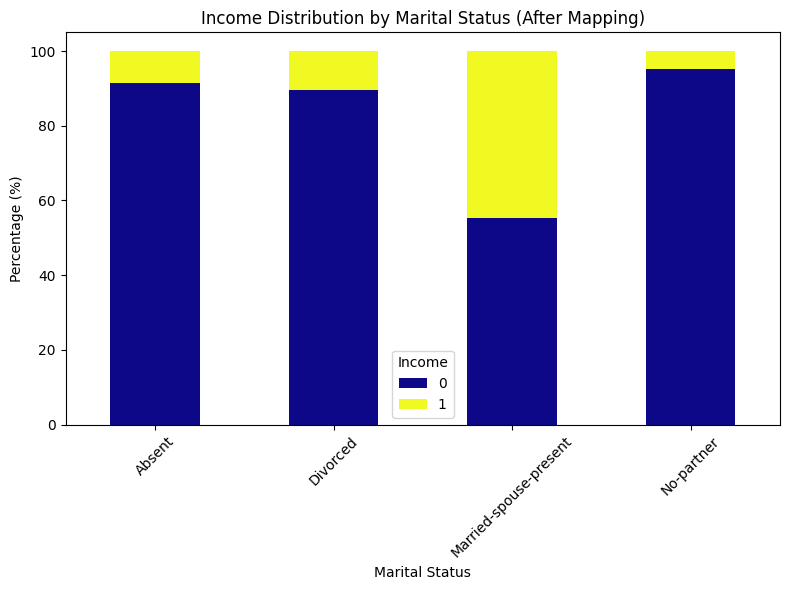

In [ ]:
new_marital_income_percent.plot(kind='bar', stacked=True, figsize=(8,6), colormap='plasma')
plt.title('Income Distribution by Marital Status (After Mapping)')
plt.ylabel('Percentage (%)')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

Native country
* mengubah negara lain selain US menjadi berkategori 'Others' agar distribusi data lebih mudah

In [ ]:
df['native.country'].value_counts() # cek frekuensi per kategori

,count
native.country,
United-States,29735
Mexico,639
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


In [ ]:
# mengganti negara selain US menjadi Others, karena frekuensi US pada data paling banyak
df['native.country'] = df['native.country'].apply(lambda x: 'Other' if x != 'United-States'else x)

Race

income                      0          1
race                                    
Amer-Indian-Eskimo  88.424437  11.575563
Asian-Pac-Islander  73.410405  26.589595
Black               87.604100  12.395900
Other               90.774908   9.225092
White               74.401871  25.598129


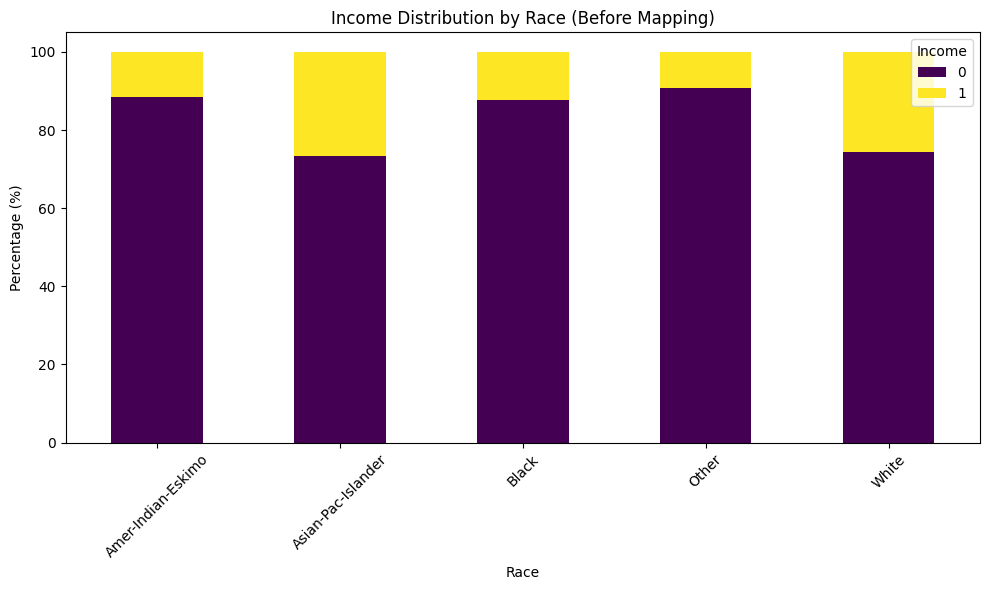

In [ ]:
race_percent = (
    df.groupby('race')['income']
      .value_counts(normalize=True)
      .unstack() * 100
)
print(race_percent) # distribusi income by race dalam persen

# plot
plt.figure(figsize=(10,6))
race_percent.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Income Distribution by Race (Before Mapping)')
plt.ylabel('Percentage (%)')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [ ]:
df['race'] = df['race'].replace({
    'Other': 'Other',
    'Amer-Indian-Eskimo': 'Black',
    'Black': 'Black',
    'White': 'White',
    'Asian-Pac-Islander': 'White'
}) # mapping ke kategori yang lebih mudah dimengerti

income          0          1
race                        
Black   87.678415  12.321585
Other   90.774908   9.225092
White   74.366178  25.633822


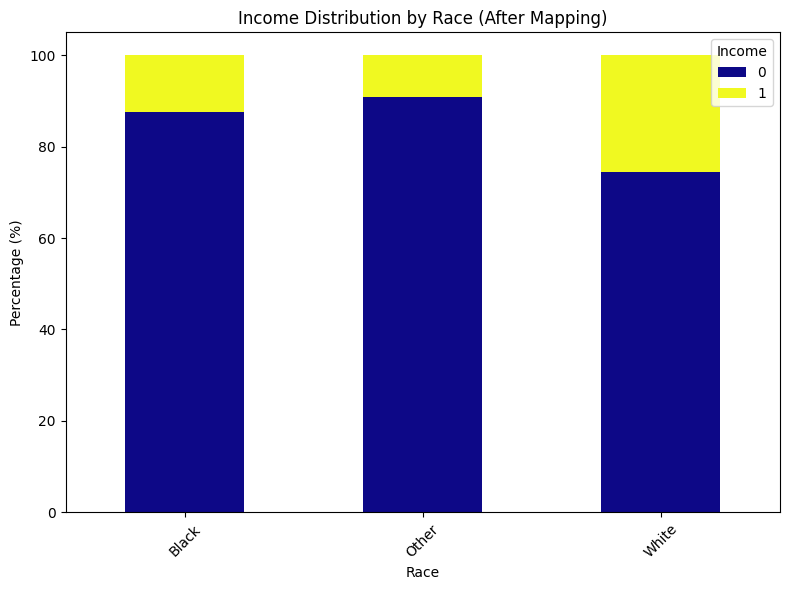

In [ ]:
new_race_percent = (
    df.groupby('race')['income']
      .value_counts(normalize=True)
      .unstack() * 100
)
print(new_race_percent)

# plot
plt.figure(figsize=(8,6))
new_race_percent.plot(kind='bar', stacked=True, colormap='plasma', ax=plt.gca())
plt.title('Income Distribution by Race (After Mapping)')
plt.ylabel('Percentage (%)')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

Occupation
* mengganti kategori pada occupation yang frekuensinya <= 1000 dengan 'Other'

In [ ]:
# hitung frekuensi setiap kategori occupation
occupation_counts = df['occupation'].value_counts()
print(occupation_counts)

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
None                 1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64


In [ ]:
# ganti kategori yang frekuensinya <= 1000 dengan 'Other'
df['occupation'] = df['occupation'].apply(lambda x: x if occupation_counts[x] > 1000 else 'Other')

Work-class

workclass
Private             69.683745
Self-emp-not-inc     7.806497
Local-gov            6.432677
Unemployed           5.642807
State-gov            3.989304
Self-emp-inc         3.429941
Federal-gov          2.950487
Without-pay          0.043028
Never-worked         0.021514
Name: proportion, dtype: float64


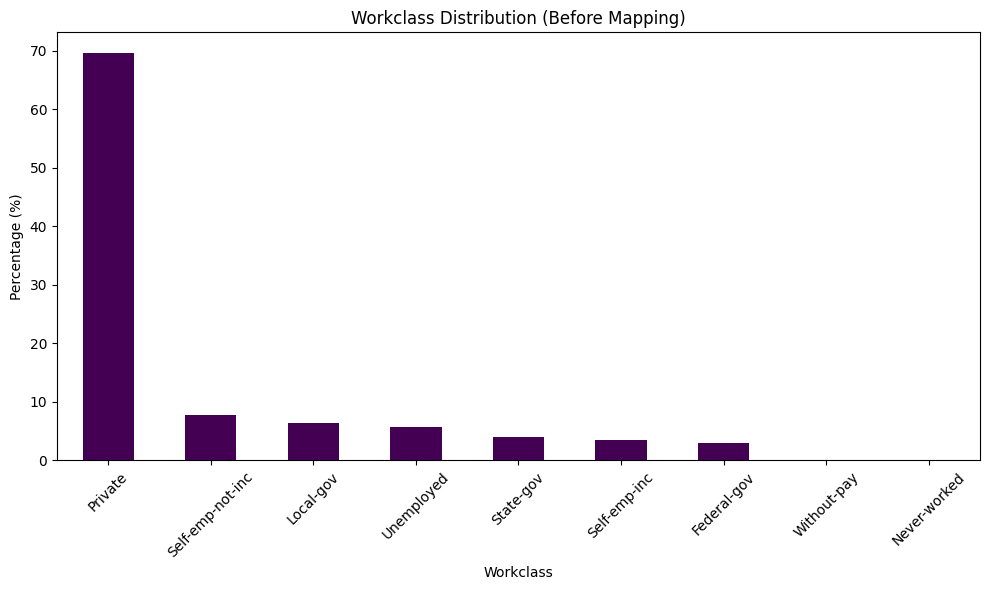

In [ ]:
workclass_percent_before = df['workclass'].value_counts(normalize=True) * 100
print(workclass_percent_before)

# plot
plt.figure(figsize=(10,6))
workclass_percent_before.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Workclass Distribution (Before Mapping)')
plt.ylabel('Percentage (%)')
plt.xlabel('Workclass')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
workclass_mapping = {
    'Private': 'Private',
    'Self-emp-not-inc': 'Self-emp-not-inc', #  tidak terkait badan hukum, bisnis dijalankan sebagai usaha perseorangan (commonly in US)
    'Local-gov': 'Local-gov',
    'Unemployed': 'Unemployed',
    'State-gov': 'State-gov',
    'Self-emp-inc': 'Self-emp-inc',  # bisnis dijalankan melalui badan hukum, seperti PT atau CV (commonly in US)
    'Federal-gov': 'Federal-gov',
    'Without-pay': 'Not-paid',
    'Never-worked': 'Not-paid'
}

df['workclass'] = df['workclass'].map(workclass_mapping)

workclass
Private             69.683745
Self-emp-not-inc     7.806497
Local-gov            6.432677
Unemployed           5.642807
State-gov            3.989304
Self-emp-inc         3.429941
Federal-gov          2.950487
Not-paid             0.064542
Name: proportion, dtype: float64


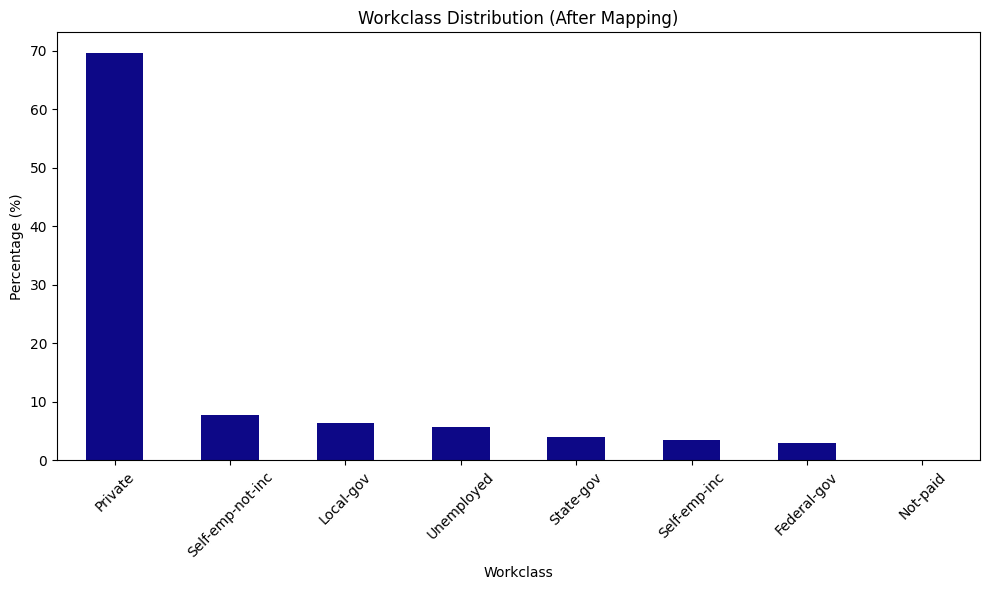

In [ ]:
workclass_percent_after = df['workclass'].value_counts(normalize=True) * 100
print(workclass_percent_after)

# plot setelah mapping
plt.figure(figsize=(10,6))
workclass_percent_after.plot(kind='bar', colormap='plasma', ax=plt.gca())
plt.title('Workclass Distribution (After Mapping)')
plt.ylabel('Percentage (%)')
plt.xlabel('Workclass')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Encoding

Ordinal Encoding

In [ ]:
ageGroupOrder = ['Youth','Middle-aged','Senior']
hours_category_order = ["Part-time", "Full-time", "Over-time", "Extreme"]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df['age_group'] = df['age_group'].astype(str)
df['work_intensity'] = df['work_intensity'].astype(str)

ordinal_encoder = OrdinalEncoder(categories=[ageGroupOrder, hours_category_order])

df[['age_group', 'work_intensity']] = ordinal_encoder.fit_transform(df[[ 'age_group', 'work_intensity']]).astype(int)

print(df[[ 'age_group', 'work_intensity']].head())

One-Hot Encoding

In [ ]:
# kolom yg akan di encoding
one_hot_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

encoded_cols = pd.get_dummies(df[one_hot_cols], prefix=one_hot_cols, drop_first=True)

# gabung dataframe hasil encoding dengan dataframe yang sudah didrop kolom aslinya
df = pd.concat([df.drop(columns=one_hot_cols), encoded_cols], axis=1)

# memastikan semua kolom hasil encoding bertipe integer
df = df.astype({col: int for col in encoded_cols.columns})


# Modelling

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['income'])
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Outlier in Training Data

-0.9006807278971027 0.4951554978345961
Outliers: [ 1.71760386  3.78103009  1.60863895 -1.30266568  4.51275033  0.66208798
 -0.92823228  1.33766392  2.81440534  2.89551605 -1.43567263]
11
0.03380766511970987


<Axes: >

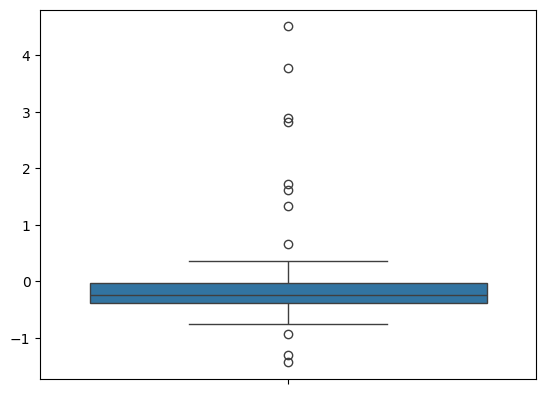

In [ ]:
a = np.array(X_train[0])
Q1 = np.percentile(a, 25)
Q3 = np.percentile(a, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

outliers = a[(a < lower_bound) | (a > upper_bound)]
print("Outliers:", outliers)
print(len(outliers))
print(len(outliers)/df.shape[0] *100 )

sns.boxplot(a)

**Data Balancing**

In [ ]:
len(X_train)

22775

In [ ]:
y_train.value_counts()

,count
income,
0,17286
1,5489


Menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani ketidakseimbangan kelas (class imbalance) dalam dataset klasifikasi, kemudian menyimpan data hasil resampling ke file CSV.

In [ ]:
from imblearn.over_sampling import SMOTE

smote_nc = SMOTE(random_state=42, k_neighbors=3, sampling_strategy=0.5)
# membuat objek SMOTE dengan:
# random_state=42
# k_neighbors=3: menggunakan 3 tetangga terdekat untuk membuat data sintetik
# sampling_strategy=0.5: menyeimbangkan jumlah data minoritas menjadi 50% dari data mayoritas

# penerapan SMOTE
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

# buat df baru dari hasil resampling dengan nama kolom sama seperti X
resampled_data = pd.DataFrame(X_train_res, columns=X.columns)

# tambahkan kolom target (label) ke df hasil resampling
resampled_data['income'] = y_train_res

# simpan data hasil resampling ke dalam file CSV
resampled_data.to_csv("adult_income_resampled.csv", index=False)

In [ ]:
y_train_res.value_counts()

,count
income,
0,17286
1,8643


## Define Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    random_state=42,
    criterion='gini',
    min_samples_leaf=2,
    min_samples_split=19,
    max_depth=10
)

### Training Model

In [ ]:
# Melatih model pada data training yang sudah diseimbangkan (hasil SMOTE)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=19,
                       random_state=42)

In [ ]:
y_pred_test=rf_model.predict(X_test) # prediksi untuk data uji dan
y_pred_train=rf_model.predict(X_train_res) # data latih

## Evaluasi

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

print("Train Accuracy (RF):", accuracy_score(y_train_res, y_pred_train))
print("Test Accuracy (RF):", accuracy_score(y_test, y_pred_test))

confusion_RF = confusion_matrix(y_test, y_pred_test )
report_RF = classification_report(y_test, y_pred_test)
# roc_score_RF = roc_auc_score(y_test, y_pred_test)

print("\nConfusion Matrix (RF):\n", confusion_RF)
print("\nClassification Report (RF):\n\n", report_RF)
# print("\nROC-AUC Score (RF):", roc_score_RF)

Train Accuracy (RF): 0.8594623780323191
Test Accuracy (RF): 0.8578160213071092

Confusion Matrix (RF):
 [[6805  607]
 [ 781 1569]]

Classification Report (RF):

               precision    recall  f1-score   support

           0       0.90      0.92      0.91      7412
           1       0.72      0.67      0.69      2350

    accuracy                           0.86      9762
   macro avg       0.81      0.79      0.80      9762
weighted avg       0.85      0.86      0.86      9762



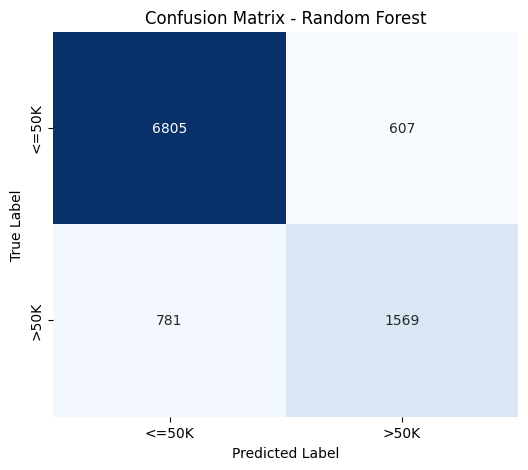

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_RF, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ["<=50K", ">50K"])
plt.yticks([0.5, 1.5], ["<=50K", ">50K"])
plt.show()